# Analiza podatkov: Wikipedia
-----------------
### OPOZORILO: <font color="red">NE</font> pognati celega notebooka!
Nekaj celic se izvaja več kot minuto.





In [1]:
from pomozne_funkcije import *

In [75]:
from pomozne_funkcije import *
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv.field_size_limit(1000000)
data_ferame_1 = pd.read_csv("podatki.csv", sep="¤", engine='python')


def plot_histogram(series):
    width = 0.5
    plt.bar(series.index, series.values, width=width)
    plt.bar(series[series.index == 'sl'].index, series[series.index == 'sl'].values, color='red', width=width)
    plt.xticks(rotation=90)
    plt.show()

def plot_histogram_df(df, x_col, y_col, highlight_value):
    data = df[[x_col, y_col]]
    data = data.sort_values(y_col)
    plt.bar(data[x_col], data[y_col])
    if highlight_value in data[x_col].values:
        highlight_index = data[x_col].values.tolist().index(highlight_value)
        plt.bar(data[x_col].iloc[highlight_index], data[y_col].iloc[highlight_index], color='red')
    plt.xticks(rotation=90)
    plt.show()

In [3]:
data_ferame_1.head(10)


,jezik,povezave,besedilo
0,sl,77,Wikipedija (angleško Wikipedia) ali Vikipedija...
1,sl,15,Système universitaire de documentation (kratic...
2,sl,35,Wikiknjige (angleško Wikibooks) je sorodni pro...
3,sl,101,Dogovori o poimenovanju so seznam smernic za u...
4,sl,125,To so osnovna navodila in smernice za uporabo ...
5,sl,125,To so osnovna navodila in smernice za uporabo ...
6,sl,62,"Lutka ali marioneta, tudi nogavičnik (izvorno ..."
7,sl,36,\nWikipedija uporablja dve metodi za urejanje:...
8,sl,16,Wikipedija vsebuje veliko število seznamov. Nj...
9,sl,89,Seznam pravil Wikipedije na kratko povzema vsa...


Poglejmo velikost povprečnega članka glede na jezik.
To bomo storili na dva načina. Izračuna povprečnega in mediano števila:
1. dolžine člankov
2. število besed

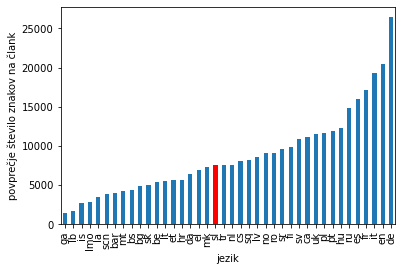

In [49]:
data_ferame_1['dolzina_1'] = data_ferame_1['besedilo'].apply(lambda x: len(x))
grouped_1 = data_ferame_1.groupby('jezik')['dolzina_1'].sum()/200
grouped_1 = grouped_1.sort_values()
grouped_1.plot.bar(ylabel="povprečje število znakov na člank")
plot_histogram(grouped_1)

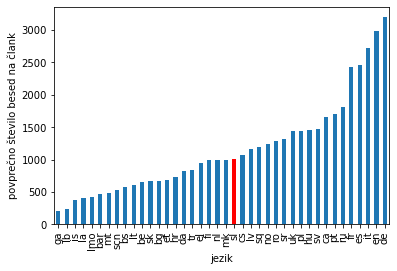

In [51]:
data_ferame_1['dolzina_2'] = data_ferame_1['besedilo'].apply(lambda x: num_of_spaces(x))
grouped_2 = data_ferame_1.groupby('jezik')['dolzina_2'].sum()/200
grouped_2 =  grouped_2.sort_values()
grouped_2.plot.bar(ylabel="povprečno število besed na člank")
plot_histogram(grouped_2)

Opazimo, da je prišlo da manjših sprememb v razverstitvah , iz česar lahko sklepamo, da je povprečna dolžina besede različna v različnih jezikih.
Presenetljivo je Nemščina na 1. mestu. 
Kljub temu lahko do neke mere opazimo korelacijo medo .
Tu je še izpis držav z največjimi povprečji.

In [6]:
grouped_2.tail(10)

jezik
hu    1456.970
sv    1477.670
ca    1663.365
pt    1706.260
ru    1813.010
fr    2432.730
es    2453.675
it    2724.325
en    2991.510
de    3198.760
Name: dolzina_2, dtype: float64

Predvidevam, da bo situacija podobna pri številu hiperpovezav.

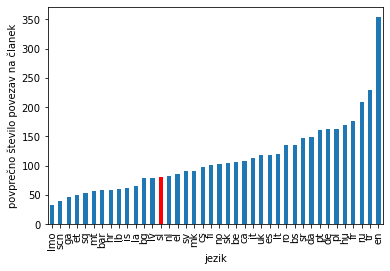

In [52]:
grouped_3 = data_ferame_1.groupby('jezik')['povezave'].sum()/200
grouped_3 = grouped_3.sort_values()
grouped_3.plot.bar(ylabel="povprečno število povezav na članek")
plot_histogram(grouped_3)

In [8]:
grouped_3.tail(10)

jezik
sr    147.245
da    149.770
pt    161.280
de    162.025
pl    163.150
hu    170.135
fr    175.895
ru    209.715
tr    229.825
en    353.675
Name: povezave, dtype: float64

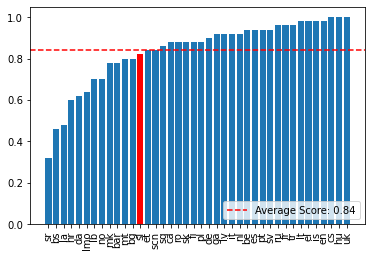

In [77]:
data_frame_1 = wrap_testing(df, [1], 150, 50)
data_frame_1 = data_frame_1.sort_values("Delež pravilno klasificiranih")
mean_score = data_frame_1["Delež pravilno klasificiranih"].mean()
plt.axhline(mean_score, color='red', linestyle='--')
plt.legend([f"Average Score: {round(mean_score, 3)}"], loc="lower right")
plot_histogram_df(data_frame_1, "Jezik", "Delež pravilno klasificiranih", "sl")

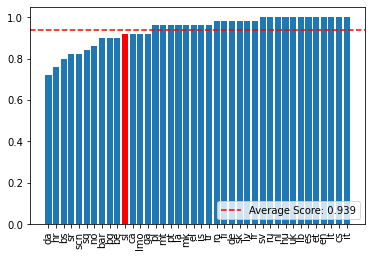

In [78]:
data_frame_2 = wrap_testing(df, [2], 150, 50)
data_frame_2 = data_frame_2.sort_values("Delež pravilno klasificiranih")
mean_score = data_frame_2["Delež pravilno klasificiranih"].mean()
plt.axhline(mean_score, color='red', linestyle='--')
plt.legend([f"Average Score: {round(mean_score, 3)}"], loc="lower right")
plot_histogram_df(data_frame_2, "Jezik", "Delež pravilno klasificiranih", "sl")

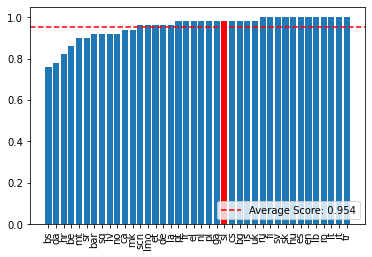

In [79]:
data_frame_3 = wrap_testing(df, [3], 150, 50)
data_frame_3 = data_frame_3.sort_values("Delež pravilno klasificiranih")
mean_score = data_frame_3["Delež pravilno klasificiranih"].mean()
plt.axhline(mean_score, color='red', linestyle='--')
plt.legend([f"Average Score: {round(mean_score, 3)}"], loc="lower right")
plot_histogram_df(data_frame_3, "Jezik", "Delež pravilno klasificiranih", "sl")

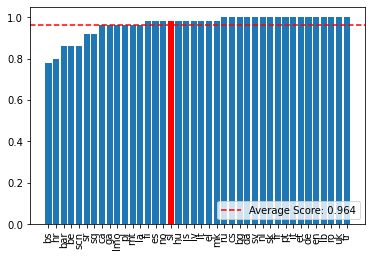

In [80]:
data_frame_4 = wrap_testing(df, [4], 150, 50)
data_frame_4 = data_frame_4.sort_values("Delež pravilno klasificiranih")
mean_score = data_frame_4["Delež pravilno klasificiranih"].mean()
plt.axhline(mean_score, color='red', linestyle='--')
plt.legend([f"Average Score: {round(mean_score, 3)}"], loc="lower right")
plot_histogram_df(data_frame_4, "Jezik", "Delež pravilno klasificiranih", "sl")